# SyriaTel Telecom Customer Churn

## 1. Defining the Question

In this Project, I will complete a machine learning workflow using classification solutions, including data preparation, modeling (including hyperparameter tuning), and final model evaluation

### a) Specifying the Data Analytic Question

>Syriatel has been leading the Syrian mobile telecommunication market since 2000. The company has successfully established its reputation by focusing on customer satisfaction and social responsibility.Understanding customer behavior is top of mind for every business today. Gaining insights into why and how customers buy can help grow revenue. But losing customers (also called customer churn) is always a risk, and insights into why customers leave can be just as important for maintaining revenues and profits. 


> **Problem Statement:** To understand customer behavior by building models to predict churn.

## Objectives

- To build a ML model that predicts whether a customer will churn or not
- To compare different ML models predictions to achieve highest accuracy
- Advice the client on best strategy

### b) Defining the Metric for Success

- Achieving a high accuracy with the best model

### c) Understanding the context 

- Understanding customer behavior is top of mind for every business today. Gaining insights into why customers churn can help grow revenue.

## 2. Reading the Data

In [108]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings("ignore")


# Loading the Data from the source i.e. csv
dataset_url = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(dataset_url)

df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




## 3. Checking the Data

In [109]:
# Determining the no. of records in our dataset
df.shape

(3333, 21)

In [110]:
print("Number of rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of rows 3333
Number of Columns 21


In [111]:
# Previewing the top of our dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


The dataset contains 3333 rows and 21 columns. Our target variable is churn.

In [112]:
# Previewing the bottom of our dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [113]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 5. Tidying the Dataset

In [114]:
# Identifying the Missing Data
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We have no missing data

In [115]:
# Checking overall statistics about the dataset
df.describe(include = 'all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,370-8379,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


## Drop Irrelevant Columns

In [116]:
#Dropping irrelevant features
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [117]:
df = df.drop(['state', 'account length', 'area code', 'phone number'],axis = 1)

In [118]:
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encoding categorical data

Converting categorical Features into Numerical <br />
The voice mail plan column and International plan column have two unique values which is yes or no.

In [119]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Instantiate an OrdinalEncoder
encoder = OrdinalEncoder()

#Fit the encoder on street_train
encoder.fit(df[['international plan']])

# Inspect the categories of the fitted encoder
#encoder_international_plan.categories_[0]

#Transform 
encoded_international_plan = encoder.transform(df[['international plan']])

# Flatten for appropriate shape
encoded_international_plan = encoded_international_plan.flatten()

# Visually inspect 
encoded_international_plan # 0 for no, 1 for yes

array([0., 0., 0., ..., 0., 1., 0.])

In [120]:
#Fit the encoder
encoder.fit(df[['voice mail plan']]) 

# Inspect the categories of the fitted encoder
#encoder_voicemail.categories_[0]

#Transform 
encoded_voicemail = encoder.transform(df[['voice mail plan']])

# Flatten for appropriate shape
encoded_voicemail = encoded_voicemail.flatten()

# Visually inspect  
encoded_voicemail #0 for no,1 for yes

array([1., 1., 0., ..., 0., 0., 1.])

In [121]:
# Replace value of Voice mail plan
df['voice mail plan'] = encoded_voicemail

#Replace value of International plan
df['international plan'] = encoded_international_plan
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#  Exploratory Data Analysis (EDA)

In trying to understand our data better, let's check for the distribution of the individual features in our dataset.

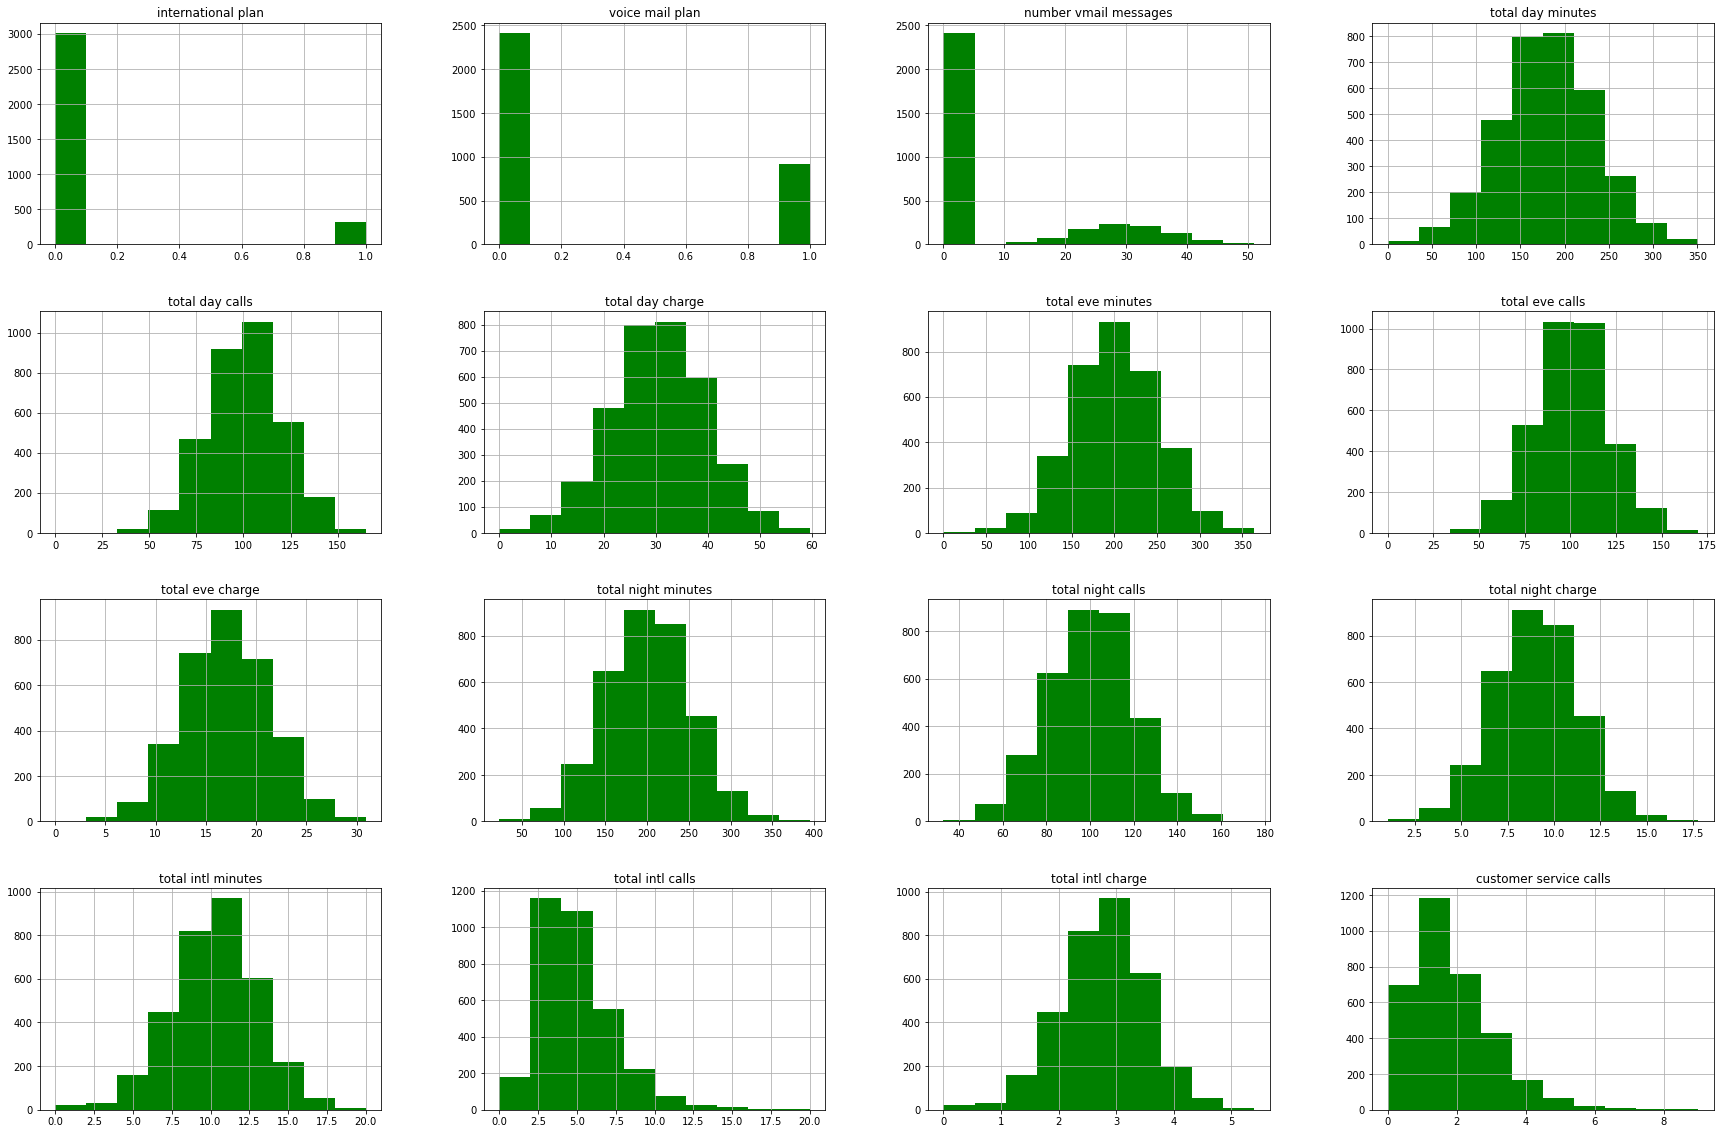

In [122]:
#Checking for Distribution of Data in the dataset
df2 = df.drop(columns='churn')
df2.hist(figsize=(30,20), color = 'green')
plt.show();

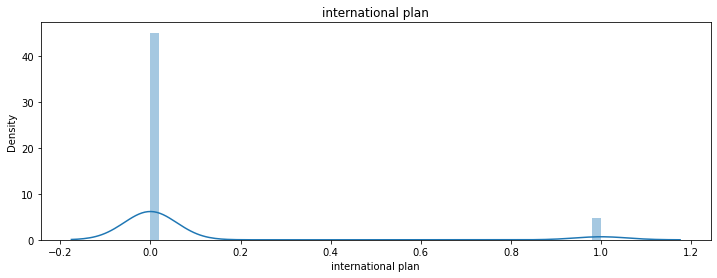

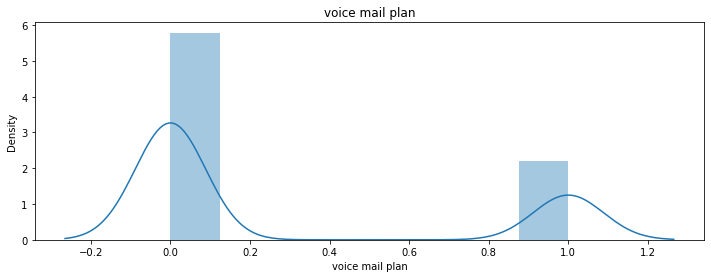

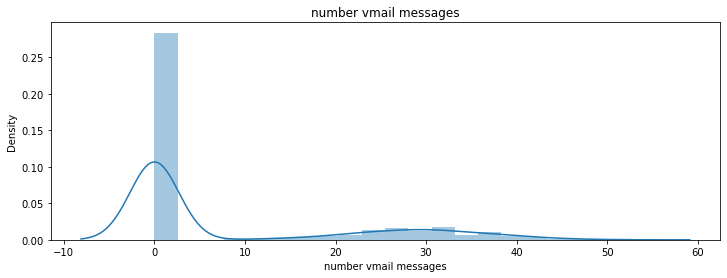

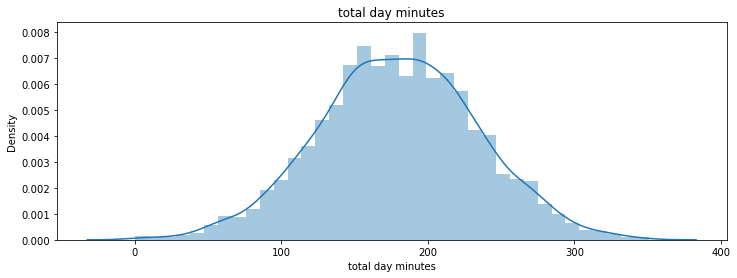

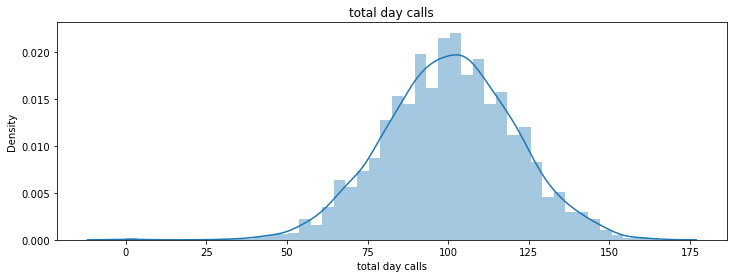

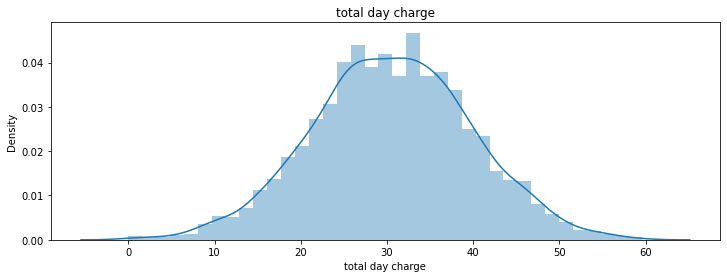

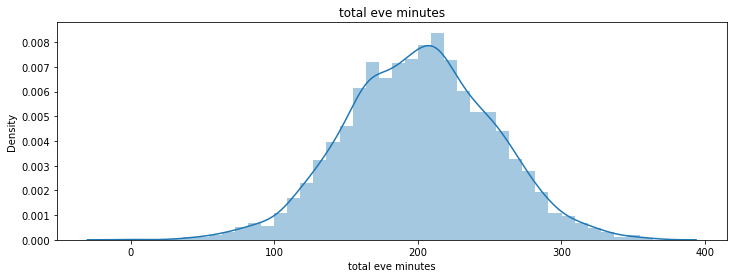

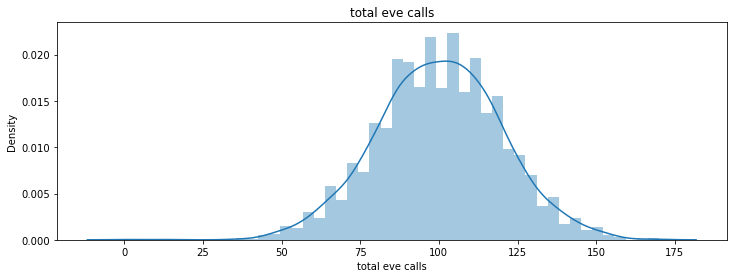

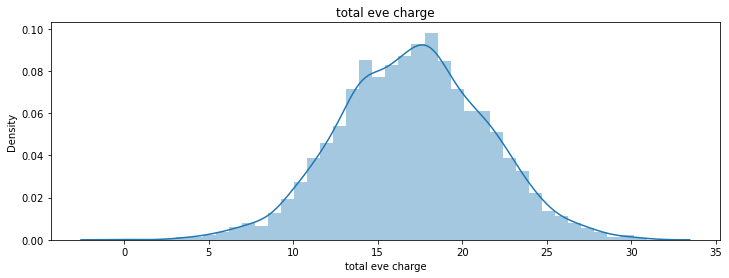

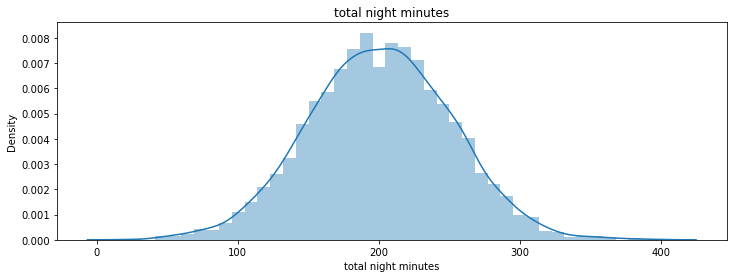

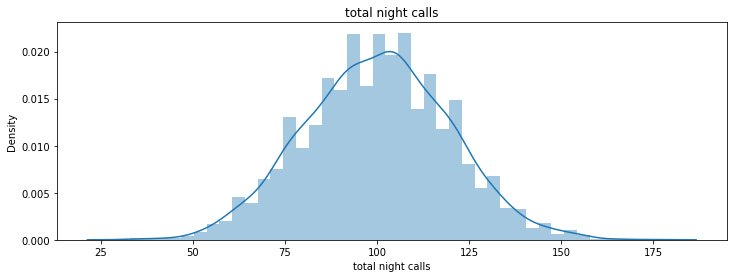

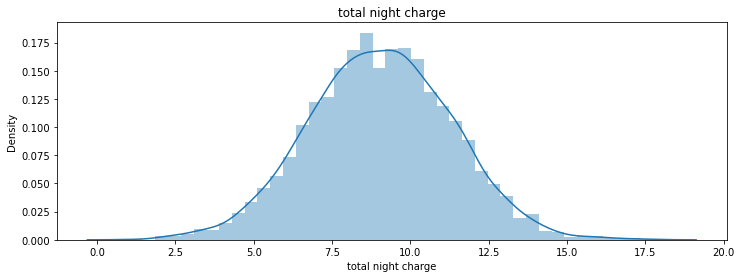

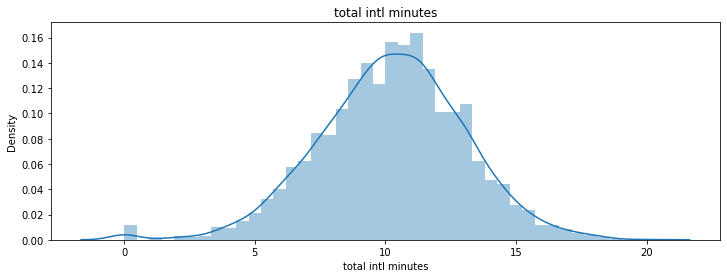

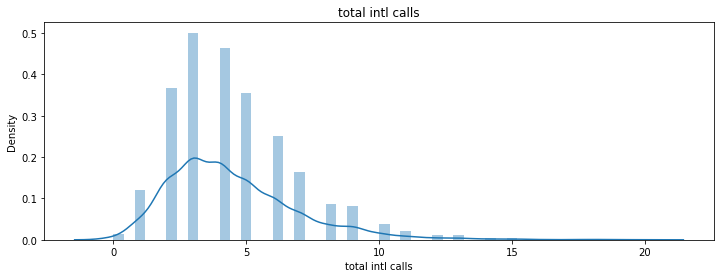

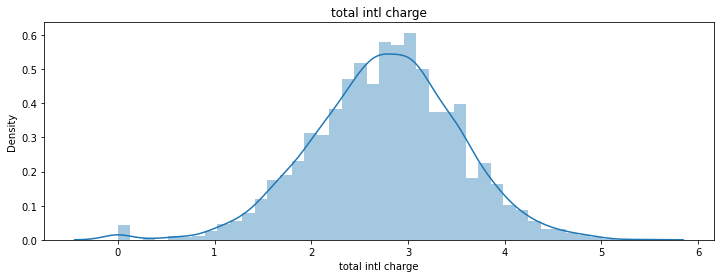

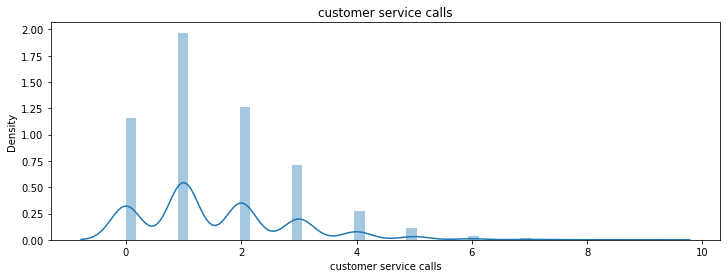

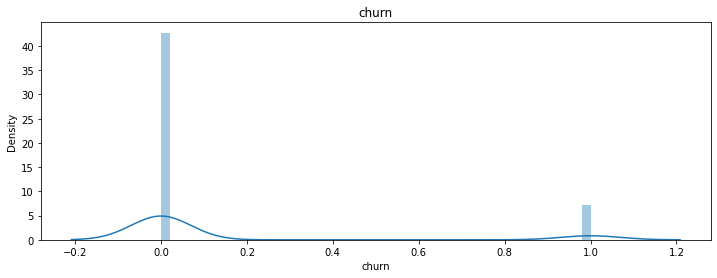

In [123]:

for col in df.columns:
  print("\n")
  plt.figure(figsize=(12,4))
  sns.distplot(df[col]).set(title = col) #you can use the histplot or the distplot
  plt.show()

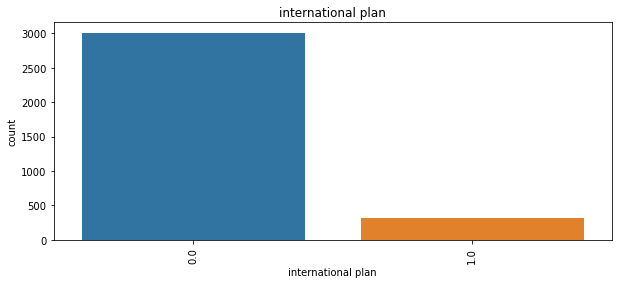

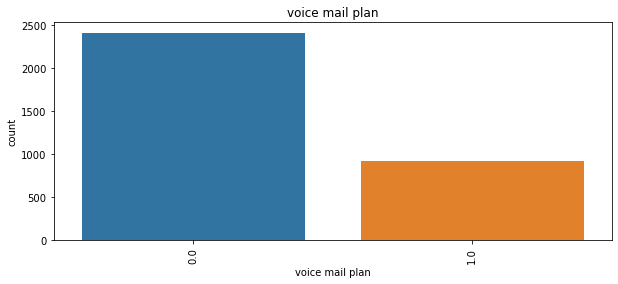

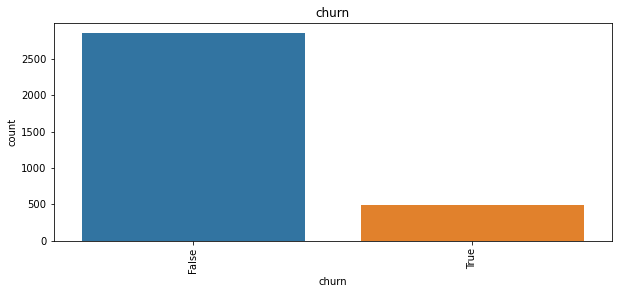

In [124]:
categoric_cols = df[['international plan', 'voice mail plan', 'churn']]
for col in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df).set(title = col)
    plt.xticks(rotation=90)
    #plt.legend(loc="upper right")
    plt.show()

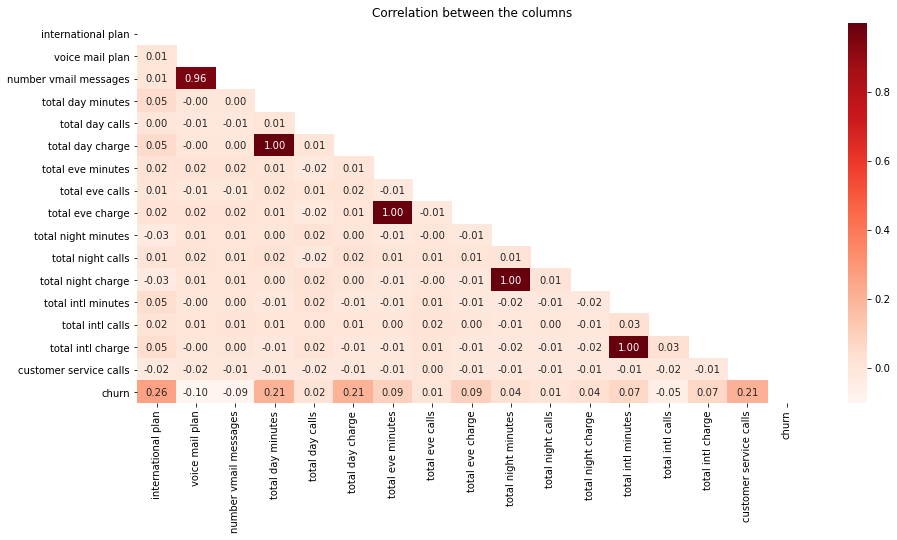

In [125]:
#correlation heatmap
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

## Checking for Class Imbalance

In [126]:
##changing bool to int 
df["churn"] = df["churn"].astype(int)
df.head()


,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [127]:
print('Raw counts: \n')
print(df['churn'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['churn'].value_counts(normalize=True))

Raw counts: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------
Normalized counts: 

0    0.855086
1    0.144914
Name: churn, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='count'>

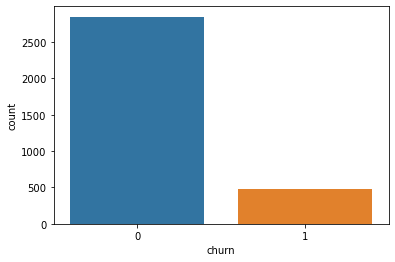

In [128]:
sns.countplot(df['churn'])

From the countplot, we can see that the data is imbalanced.

## Handling imbalanced data with SMOTE


In [129]:
y = df['churn']
X = df.drop(columns = 'churn') 

In [130]:
X_resample, y_resample = SMOTE().fit_resample(X, y)

In [131]:
y_resample.value_counts()

1    2850
0    2850
Name: churn, dtype: int64

## Splitting data into Training set and Testing set

In [132]:
#split data using the train_test_split module imported above

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.20, random_state = 42)

## Feature Scaling

In [133]:
#Instantiate a scaler
scaler = StandardScaler()

#transform the X_train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [135]:
#Instantiate a logReg model
log = LogisticRegression()

In [136]:
log.fit(X_train, y_train)

LogisticRegression()

In [137]:
y_predict1 = log.predict(X_test)

In [138]:
accuracy_score(y_test, y_predict1)

0.7578947368421053

Next we check for precision, recall and f1 score.

In [139]:
precision_score(y_test, y_predict1)

0.7513513513513513

In [140]:
recall_score(y_test, y_predict1)

0.7513513513513513

In [141]:
f1_score(y_test, y_predict1)

0.7513513513513513

## SVC

In [142]:
svm = svm.SVC()

In [143]:
svm.fit(X_train, y_train)
y_predict2 = svm.predict(X_test)


In [144]:
# calculate paccuracy score
accuracy_score(y_test, y_predict2)

0.9149122807017543

In [145]:
precision_score(y_test, y_predict2)

0.9272388059701493

In [146]:
recall_score(y_test, y_predict2)

0.8954954954954955

In [147]:
f1_score(y_test, y_predict2)

0.9110907424381302

# KNeighbours Classifier

In [148]:
#instantiate a knn class
knn = KNeighborsClassifier()

In [149]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [150]:
y_predict3 = knn.predict(X_test)

In [151]:
accuracy_score(y_test, y_predict3)

0.9140350877192982

In [152]:
precision_score(y_test, y_predict3)

0.8667736757624398

In [153]:
recall_score(y_test, y_predict3)

0.972972972972973

In [154]:
f1_score(y_test, y_predict3)

0.9168081494057726

# Decision Tree Classifier

In [155]:
dt = DecisionTreeClassifier()

In [156]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [157]:
y_predict4 = dt.predict(X_test)

In [158]:
accuracy_score(y_test, y_predict4)

0.9087719298245615

In [159]:
precision_score(y_test, y_predict4)

0.9005328596802842

In [160]:
recall_score(y_test, y_predict4)

0.9135135135135135

In [161]:
f1_score(y_test, y_predict4)

0.9069767441860465

# Random Forests

In [162]:
rf = RandomForestClassifier()

In [163]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [164]:
y_predict5 = rf.predict(X_test)

In [165]:
accuracy_score(y_test, y_predict5)

0.9552631578947368

In [166]:
precision_score(y_test, y_predict5)

0.9666666666666667

# Gradient Boosting Classifier

In [167]:
gbc = GradientBoostingClassifier()

In [168]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [169]:
y_predict6 = gbc.predict(X_test)

In [170]:
accuracy_score(y_test, y_predict6)

0.9228070175438596

In [171]:
precision_score(y_test, y_predict6)

0.9551656920077972

## Choosing The Best Model 

In [172]:
models_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'ACC': [accuracy_score(y_test, y_predict1),
                               accuracy_score(y_test, y_predict2),
                               accuracy_score(y_test, y_predict3),
                               accuracy_score(y_test, y_predict4),
                               accuracy_score(y_test, y_predict5),
                               accuracy_score(y_test, y_predict6),]})
#Check the dataframe
models_df

,Models,ACC
0,LR,0.757895
1,SVC,0.914912
2,KNN,0.914035
3,DT,0.908772
4,RF,0.955263
5,GBC,0.922807


 Random Forests has the highest accuracy score

<AxesSubplot:xlabel='Models', ylabel='ACC'>

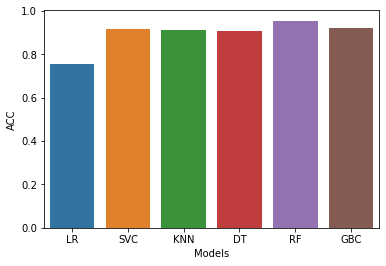

In [173]:
sns.barplot(models_df['Models'], models_df['ACC'])

In [174]:
models_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'], 
                        'PRE': [precision_score(y_test, y_predict1),
                               precision_score(y_test, y_predict2),
                               precision_score(y_test, y_predict3),
                               precision_score(y_test, y_predict4),
                               precision_score(y_test, y_predict5),
                               precision_score(y_test, y_predict6),]})
#Check the dataframe
models_df

,Models,PRE
0,LR,0.751351
1,SVC,0.927239
2,KNN,0.866774
3,DT,0.900533
4,RF,0.966667
5,GBC,0.955166


##### Random Forests has the highest precision as well

<AxesSubplot:xlabel='Models', ylabel='PRE'>

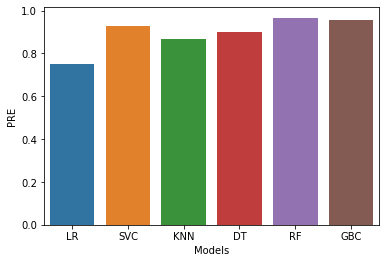

In [175]:
sns.barplot(models_df['Models'], models_df['PRE'])

Using the test accuracy, the top perfoming models are:
- Random Forest Classifier (best)
- Gradient Boosting Classifier 
- Decision Tree Classifier

- Random Forest and Gradient Boosting show high cases of overfitting. More tuning could improve these models.
- I will perform more tuning to Random Forest Classifier to improve it 

##  Implementing the Random Forests Model
 I will employ hyperparameter tuning to improve model accuracy <br/>

Using random search, I will carry out several iterations to get the best conditions for random forest and run them to get an accuracy.

In [176]:
X_resample = scaler.fit_transform(X_resample)

In [213]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc = RandomForestClassifier()
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 400, 'max_features': 'auto', 'max_depth': None}


In [215]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc = RandomForestClassifier(n_estimators=400, max_depth=None, max_features='auto')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X_resample, y_resample, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[570  15]
 [ 38 517]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       585
           1       0.97      0.93      0.95       555

    accuracy                           0.95      1140
   macro avg       0.95      0.95      0.95      1140
weighted avg       0.95      0.95      0.95      1140



=== All AUC Scores ===
[0.97674361 0.98383503 0.99509388 0.9952293  0.99713143 0.99377039
 0.99508156 0.99356725 0.99127116 0.99112342]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9912847029855341


- The model has a precision of 97%, recall of 93% and f1-score of 95% which shows that the model performs well.
- From the final model, we can now run a feature importance.
- This will help show which features matter most.
- I will list the top 10

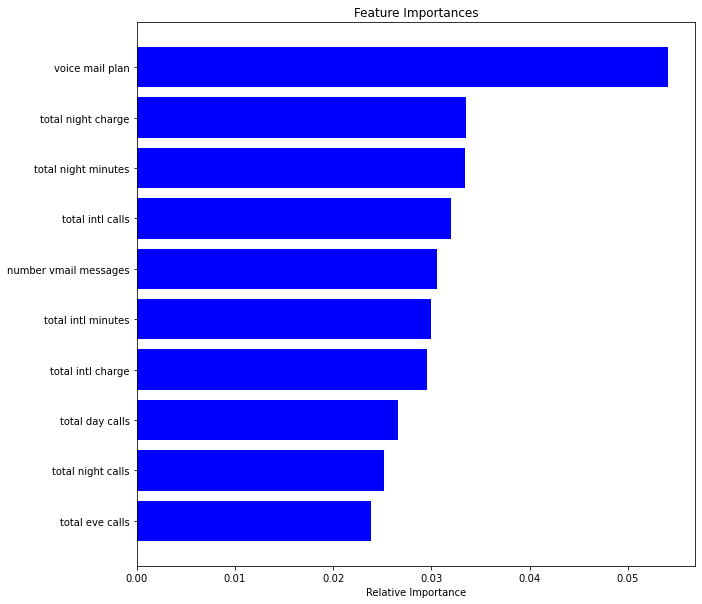

In [224]:
#add column names
X_train = pd.DataFrame(X_train, columns = X.columns)
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[:10]

# customized number 
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [225]:
# Implementing the Solution

#pickling
joblib.dump(rfc, 'Churn_Prediction_model')

['Churn_Prediction_model']

In [226]:
model = joblib.load('Churn_Prediction_model')

In [227]:
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [230]:
churn = model.predict([[0,1,10,0,5,0,0,5,0,50,1,10,40,5,100,0]])
 #0 for the customer will not leave, 1 for te customer will leave

#if churn:
    #print("The customer will churn/leave")
#else:
    #print("This customer will stay") 
churn

array([1])

## Conclusion

- The top 10 important features are voice mail plan,total night charge, total night minutes, total international calls,number of voice mail messages,total intl minutes, total intl charge,total day calls, total night calls and total eve calls 
- When customer service calls are more than 2 then the customer tends to leave.
- Customers with international plan churn at a higher rate than the customers without international plan churn.

## Recommendations

- SyriaTel should improve the customer service.
- Syriatel should reduce charges for international calls in order to retain customers with international plan.